in this post we talk about the fit transform pattern common in machine learning and ETL pipelines. we'll learn about the well documented industry standards for transforming datasets using `sklearn`.

* scatter plot of motivation (how to make the data?)

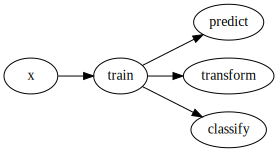

In [26]:
    __import__("graphviz").Source("digraph {rankdir=LR x->train->{predict transform classify}}")

## The fit/transform pattern

In [82]:
### The problem

In [1]:
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    x = np.linspace(0, 100, 50)
    y = 0.3 * x + np.random.normal(scale=2.0, size=x.shape)

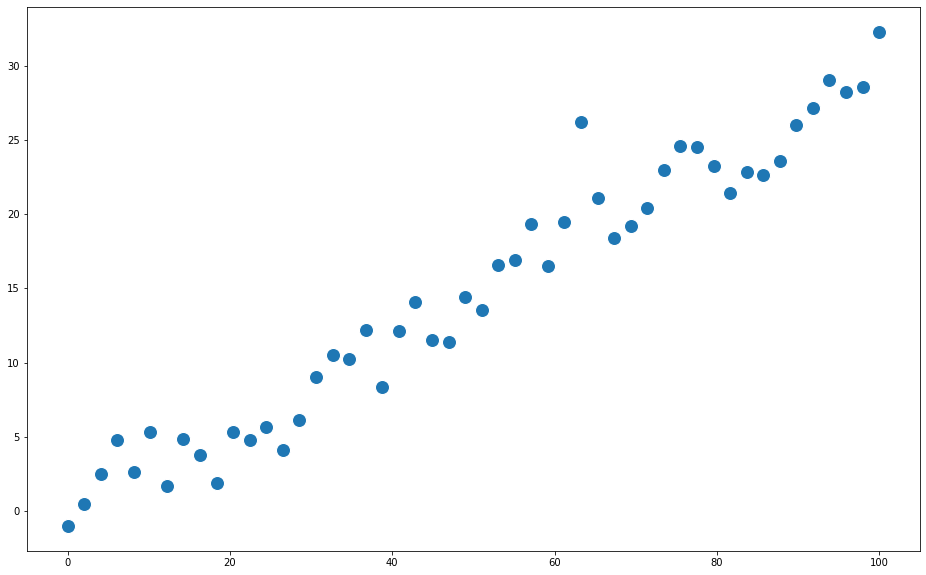

In [6]:
    plt.figure(figsize=(16, 10))
    sns.scatterplot(x=x, y=y, s=200);

In [14]:
    import numpy, pandas, sklearn

a functional pattern

In [15]:
    def transform(x):
        return x - numpy.mean(x) / numpy.std(x)

In [16]:
    def predict(x):
        return w * x + b

object oriented pattern

In [17]:
    class Transformer:
        def fit(self, x):
            self.mean = numpy.mean(x)
            self.std = numpy.std(x)        

        def transform(self, x):
            return (x - self.mean) / self.std

In [18]:
    sklearn_bases = sklearn.base.TransformerMixin, sklearn.base.BaseEstimator

In [19]:
    class StandardScalar(Transformer, *sklearn_bases):
        pass

## the standard transformers

the transformers are scattered through the `sklearn` modules

In [28]:
    import sklearn.preprocessing, sklearn.impute, sklearn.pipeline

## extra credit composing transformers in `sklearn`

In [53]:
def get_submodule(cls):
    for t in cls.__subclasses__():
        yield t
        yield from get_submodule(t)
        
s = pandas.Index(get_submodule(sklearn.base.TransformerMixin))

def clean_name(x):
    beginning, sep, end = x.rpartition(".")
    if end.startswith("_"):
        return beginning
    return x

df = s.to_series().apply(
    lambda x: pandas.Series({
        k: getattr(x, F"__{k}__") for k in "module name".split()
    })
)

df.module = df.module.apply(clean_name)
df = df[df.module != ""]
df["name"] = df.name.str.replace("_", "")
df.reset_index(drop=True, inplace=True)

In [58]:
    for name in df.name:
        print(name)

FunctionTransformer
BaseEncoder
OneHotEncoder
OrdinalEncoder
MinMaxScaler
StandardScaler
MaxAbsScaler
RobustScaler
PolynomialFeatures
Normalizer
Binarizer
KernelCenterer
QuantileTransformer
PowerTransformer
LabelEncoder
LabelBinarizer
MultiLabelBinarizer
KBinsDiscretizer
BaseImputer
SimpleImputer
KNNImputer
MissingIndicator
KNeighborsTransformer
RadiusNeighborsTransformer
NMF
BasePCA
PCA
IncrementalPCA
KernelPCA
BaseSparseCoding
SparseCoder
DictionaryLearning
MiniBatchDictionaryLearning
SparsePCA
MiniBatchSparsePCA
TruncatedSVD
FastICA
FactorAnalysis
LatentDirichletAllocation
NeighborhoodComponentsAnalysis
FeatureUnion


## Basic Transformers

|                     |                            |                                |                             |
| ------------------- | -------------------------- | ------------------------------ | --------------------------- |
| FunctionTransformer | BaseImputer                | KernelCenterer                 | BaseSparseCoding            |
| BaseEncoder         | SimpleImputer              | QuantileTransformer            | SparseCoder                 |
| OneHotEncoder       | KNNImputer                 | PowerTransformer               | DictionaryLearning          |
| OrdinalEncoder      | MissingIndicator           | LabelEncoder                   | MiniBatchDictionaryLearning |
| MinMaxScaler        | KNeighborsTransformer      | LabelBinarizer                 | SparsePCA                   |
| StandardScaler      | RadiusNeighborsTransformer | MultiLabelBinarizer            | MiniBatchSparsePCA          |
| MaxAbsScaler        | NMF                        | KBinsDiscretizer               | TruncatedSVD                |
| RobustScaler        | BasePCA                    | LatentDirichletAllocation      | FastICA                     |
| PolynomialFeatures  | PCA                        | NeighborhoodComponentsAnalysis | FactorAnalysis              |
| Normalizer          | IncrementalPCA             | FeatureUnion                   |                             |
| Binarizer           | KernelPCA                  |                                |                             |


In [40]:
    sklearn.pipeline.FeatureUnion([
        ("kbins", sklearn.preprocessing.KBinsDiscretizer()),
        ("onehot", sklearn.preprocessing.OneHotEncoder()),
    ])

FeatureUnion(transformer_list=[('kbins', KBinsDiscretizer()),
                               ('onehot', OneHotEncoder())])

In [41]:
    sklearn.pipeline.Pipeline([
            ("transform", sklearn.pipeline.FeatureUnion([
                ("kbins", sklearn.preprocessing.KBinsDiscretizer()),
                ("onehot", sklearn.preprocessing.OneHotEncoder()),
            ])), ("predict", sklearn.base.BaseEstimator())
    ])

TypeError: Last step of Pipeline should implement fit or be the string 'passthrough'. 'BaseEstimator()' (type <class 'sklearn.base.BaseEstimator'>) doesn't

# conclusion

* use `sklearn`'s transformers, don't roll your own.